<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customer-Churn-Prediction-for-a-Telecommunications-Company" data-toc-modified-id="Customer-Churn-Prediction-for-a-Telecommunications-Company-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Customer Churn Prediction for a Telecommunications Company</a></span></li><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data loading</a></span></li><li><span><a href="#Exploratory-analysis-and-data-preprocessing" data-toc-modified-id="Exploratory-analysis-and-data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory analysis and data preprocessing</a></span></li><li><span><a href="#Data-Merging" data-toc-modified-id="Data-Merging-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Merging</a></span></li><li><span><a href="#Exploratory-analysis-and-data-preprocessing-of-the-merged-dataframe" data-toc-modified-id="Exploratory-analysis-and-data-preprocessing-of-the-merged-dataframe-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory analysis and data preprocessing of the merged dataframe</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Quantitative-Features" data-toc-modified-id="Quantitative-Features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Quantitative Features</a></span></li><li><span><a href="#Cross-Correlation-Analysis" data-toc-modified-id="Cross-Correlation-Analysis-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cross-Correlation Analysis</a></span></li></ul></li><li><span><a href="#Data-Preparation-for-Training-and-Testing" data-toc-modified-id="Data-Preparation-for-Training-and-Testing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preparation for Training and Testing</a></span></li><li><span><a href="#Training-Machine-Learning-Models" data-toc-modified-id="Training-Machine-Learning-Models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training Machine Learning Models</a></span></li><li><span><a href="#Selecting-the-Best-Model" data-toc-modified-id="Selecting-the-Best-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Selecting the Best Model</a></span><ul class="toc-item"><li><span><a href="#Best-Model:-CatBoost" data-toc-modified-id="Best-Model:-CatBoost-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Best Model: CatBoost</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Confusion-Matrices" data-toc-modified-id="Confusion-Matrices-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Confusion Matrices</a></span></li></ul></li><li><span><a href="#Conclusion-and-Recommendations" data-toc-modified-id="Conclusion-and-Recommendations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion and Recommendations</a></span></li></ul></div>

# Customer Churn Prediction for a Telecommunications Company


The telecom provider wants to combat client churn. To do this, its employees will start offering promo codes and special conditions to everyone who plans to cancel their services. We need to identify such users in advance.

**Objective:** Create a model for the company that will predict whether a client will terminate the service.

The provider's team collected personal data on some clients, as well as information about their plans and services. 

**Service Description:** The operator provides two main types of services 

1. Landline telephone service. The phone can be connected to multiple lines simultaneously.
2. Internet service. There are two types of connections: through a telephone line (DSL, or digital subscriber line) or via fiber optic cable.

Additional services include:
- Internet security: antivirus (DeviceProtection) and unsafe site blocking (OnlineSecurity);
- Dedicated technical support line (TechSupport);
- Cloud storage for data backup (OnlineBackup);
- Streaming TV (StreamingTV) and a movie catalog (StreamingMovies).
- Customers can pay for services monthly or sign a 1–2 year contract. Various payment methods are available, and they can also receive an electronic receipt.

We load the necessary libraries and helper functions:

In [1]:
import pandas as pd   
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

from catboost import CatBoostClassifier
from catboost import cv, Pool

from sklearn.metrics import (
                            roc_auc_score,
                            recall_score,
                            ConfusionMatrixDisplay
                            )

from sklearn.preprocessing import (
                                   OneHotEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   LabelEncoder
                                  )

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
    
from sklearn.dummy import DummyClassifier

from helper_functions import (
                              importdata
                             ,all_labels
                             ,en2hu_name
                             ,search_for_nans
                             ,print_unique_names
                             ,split2train_valid
                             ,corrcoef2interp
                             ,extract_cats
                            )

import phik
import shap
import warnings
warnings.filterwarnings("ignore")

#global constants
RANDOM_STATE =  50824
TRAIN_TEST_SPLIT_RATIO = 0.25
DATA_EXPORT_DATE = '2020-02-01'

# Data loading

In [2]:
filedirs = ['../datasets/']

fnames = ['contract_new',
          'personal_new',
          'internet_new',
          'phone_new']
dfs_dic = {}
for fname in fnames:
    dfs_dic[fname] = importdata(filedirs,fname+'.csv') 

File contract_new.csv is loaded from ../datasets/
File personal_new.csv is loaded from ../datasets/
File internet_new.csv is loaded from ../datasets/
File phone_new.csv is loaded from ../datasets/


# Exploratory analysis and data preprocessing

In [3]:
for key in dfs_dic.keys():
    print('*'*10,key,'*'*10)
    dfs_dic[key].info()

********** contract_new **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
********** personal_new **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  70

We will join smaller tables to the larger one using the Left Join. We will need to perform data type conversions, such as converting TotalCharges from a string to a floating-point type.

Let’s take a closer look.

In [4]:
for key in dfs_dic.keys():
    print('*'*10,key,'*'*10)
    print_unique_names(dfs_dic[key],dfs_dic[key].columns)

********** contract_new **********
customerID : Number of unique values 7043 :
  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
BeginDate : Number of unique values 77 :
  ['2013-10-01' '2013-11-01' '2013-12-01' '2014-01-01' '2014-02-01'
 '2014-03-01' '2014-04-01' '2014-05-01' '2014-06-01' '2014-07-01'
 '2014-08-01' '2014-09-01' '2014-10-01' '2014-11-01' '2014-12-01'
 '2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01' '2016-01-01' '2016-02-01' '2016-03-01'
 '2016-04-01' '2016-05-01' '2016-06-01' '2016-07-01' '2016-08-01'
 '2016-09-01' '2016-10-01' '2016-11-01' '2016-12-01' '2017-01-01'
 '2017-02-01' '2017-03-01' '2017-04-01' '2017-05-01' '2017-06-01'
 '2017-07-01' '2017-08-01' '2017-09-01' '2017-10-01' '2017-11-01'
 '2017-12-01' '2018-01-01' '2018-02-01' '2018-03-01' '2018-04-01'
 '2018-05-01' '2018-06-01' '2018-07-01' '2018-08-01' '2018-09-01'

Most features are categorical and binary, with fewer having three or more values. CatBoost comes to mind, and overall, decision trees are well-suited for this kind of unbalanced proportion of categorical/numerical features. 

We create labels for training: active = 0 (client is active) and quit = 1 (client is inactive, i.e., has "churned").

In [5]:
check_EndDate = dfs_dic['contract_new']['EndDate']== 'No'
print(f'Number of active clients {check_EndDate.sum()}')
dfs_dic['contract_new']['ClientStatus'] = np.where(check_EndDate, 'active', 'quit')

dfs_dic['contract_new'].loc[check_EndDate, 'EndDate'] = DATA_EXPORT_DATE
display(dfs_dic['contract_new'].sample(5,random_state=RANDOM_STATE+1))
dfs_dic['contract_new']['ClientStatus'].unique()

Number of active clients 5942


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ClientStatus
6022,5025-GOOKI,2018-06-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),18.9,378.0,active
3437,2746-DIJLO,2016-09-01,2019-01-01,One year,Yes,Credit card (automatic),56.3,1576.4,quit
5675,4983-CCWMC,2019-11-01,2020-02-01,Month-to-month,Yes,Mailed check,69.6,223.42,active
2561,3230-JCNZS,2014-03-01,2018-07-01,Two year,Yes,Credit card (automatic),99.0,5559.84,quit
836,8184-WMOFI,2014-12-01,2020-02-01,One year,No,Credit card (automatic),71.4,4648.14,active


array(['active', 'quit'], dtype=object)

We create a column for contract duration and convert it to an integer format. 

In [6]:
dfs_dic['contract_new']['EndDate'] = pd.to_datetime(dfs_dic['contract_new']['EndDate'])
dfs_dic['contract_new']['BeginDate'] = pd.to_datetime(dfs_dic['contract_new']['BeginDate'])
dfs_dic['contract_new']['ContractDuration'] = \
  (dfs_dic['contract_new']['EndDate']- dfs_dic['contract_new']['BeginDate']).dt.days
dfs_dic['contract_new']['ContractDuration'] = dfs_dic['contract_new']['ContractDuration'].astype(int)
dfs_dic['contract_new'].head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ClientStatus,ContractDuration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,active,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,active,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,active,123


There are missing values in some columns.

In [7]:
for key in dfs_dic.keys():
    print('*'*10,key,'*'*10)
    for col in dfs_dic[key].columns:
        check_blank = dfs_dic[key][col].astype(str).str.isspace()
        n_spaces = check_blank.sum()
        if n_spaces>0:
            print(col,f'contains {n_spaces} blanks')
            display(dfs_dic[key][check_blank])

********** contract_new **********
TotalCharges contains 11 blanks


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ClientStatus,ContractDuration
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,active,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,active,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,active,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,active,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,active,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,active,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,active,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,active,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,active,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,active,0


********** personal_new **********
********** internet_new **********
********** phone_new **********


Filling in missing values for TotalCharges doesn’t make sense since these clients signed a contract during the month of data extraction. We will remove these clients from the train and test datasets.

In [8]:
check_blank = dfs_dic['contract_new']['TotalCharges'].astype(str).str.isspace()
dfs_dic['contract_new']=dfs_dic['contract_new'][~check_blank]
dfs_dic['contract_new']['TotalCharges'] = dfs_dic['contract_new']['TotalCharges'].astype(float)

# Data Merging

We will merge separate tables into one table and handle missing values in the pipeline.

In [9]:
full_table = dfs_dic['contract_new'].merge(
    dfs_dic['personal_new'], how='left', on = 'customerID')
full_table = full_table.merge(
    dfs_dic['internet_new'], how='left', on = 'customerID')
full_table = full_table.merge(
    dfs_dic['phone_new'], how='left', on = 'customerID')
full_table.info()
display(full_table.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   ClientStatus      7032 non-null   object        
 9   ContractDuration  7032 non-null   int32         
 10  gender            7032 non-null   object        
 11  SeniorCitizen     7032 non-null   int64         
 12  Partner           7032 non-null   object        
 13  Dependents        7032 non-null   object        
 14  InternetService   5512 n

,MonthlyCharges,TotalCharges,ContractDuration,SeniorCitizen
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,64.798208,2118.621822,899.961320,0.162400
std,30.085974,2112.736199,682.738777,0.368844
min,18.250000,19.050000,28.000000,0.000000
25%,35.587500,439.745000,276.000000,0.000000
50%,70.350000,1345.275000,761.000000,0.000000
75%,89.862500,3239.317500,1461.000000,0.000000
max,118.750000,9221.380000,2314.000000,1.000000


So far, nothing is suspicious.

# Exploratory analysis and data preprocessing of the merged dataframe

## Categorical Features

Let’s check if the target feature **ClientStatus** classes are balanced

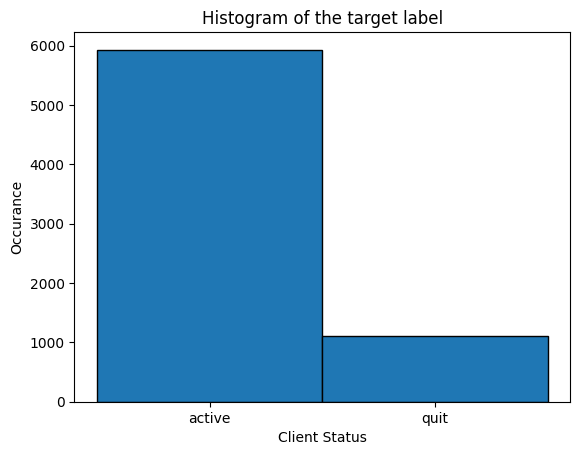

Number of active clients:  5931
Number of clients terminated the contract:  1101


In [10]:
fig, ax = plt.subplots()
sns.histplot(full_table,x='ClientStatus'\
            ,ax=ax,  alpha=1.0)

plt.ylabel('Occurance')
plt.xlabel(en2hu_name(['ClientStatus'],all_labels)[0])
relabel = []
for label in ax.get_xticklabels()[:]:
    relabel.append(label.get_text())
ax.xaxis.set_ticks(relabel)
ax.set_xticklabels(en2hu_name(relabel,all_labels))

plt.title('Histogram of the target label')
plt.show()

print('Number of active clients: ',(full_table['ClientStatus']=='active').sum())
print('Number of clients terminated the contract: ',(full_table['ClientStatus']!='active').sum())

We observe a class imbalance. The number of customers who have terminated their contracts is more than five times higher.

Let's take a look at the input categorical features in terms of client activity.

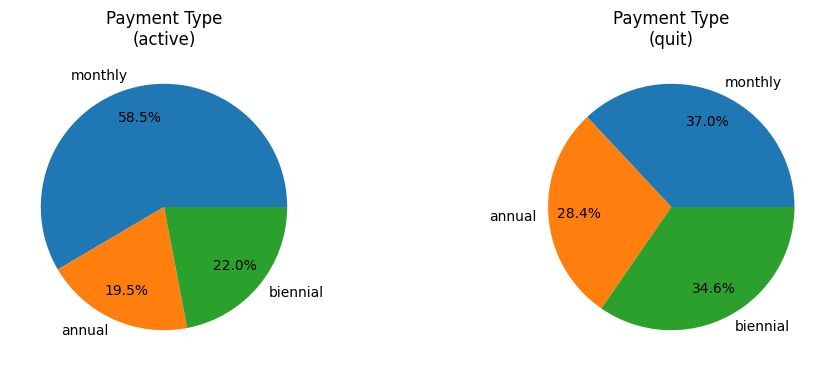

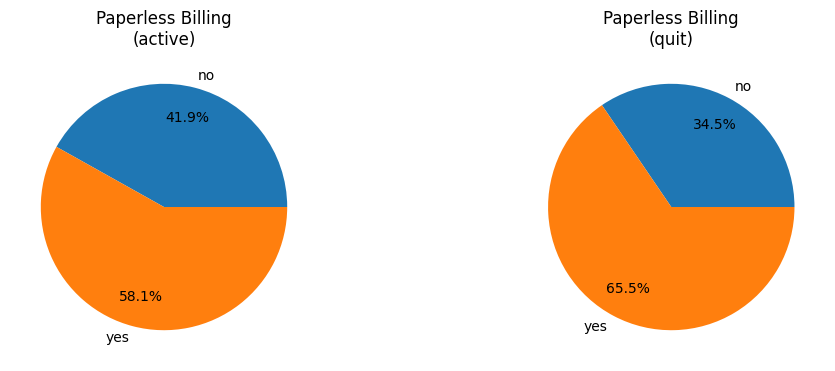

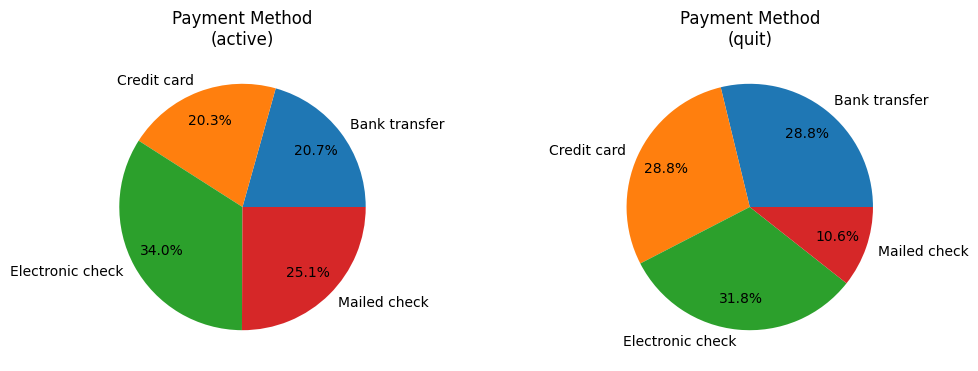

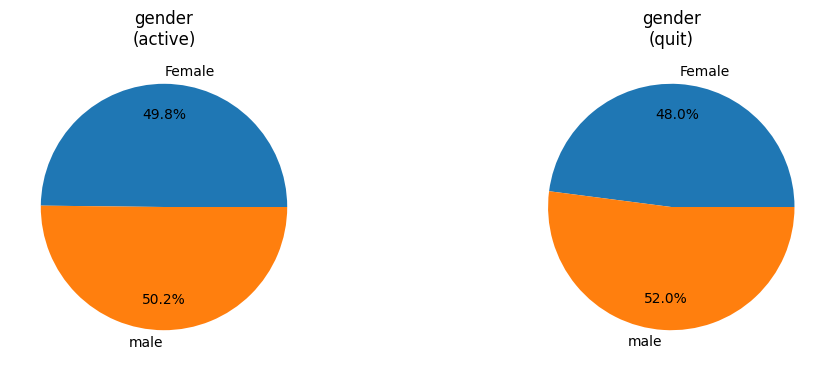

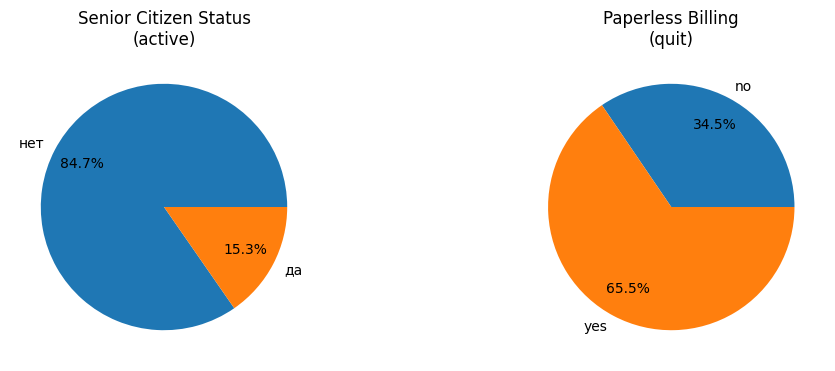

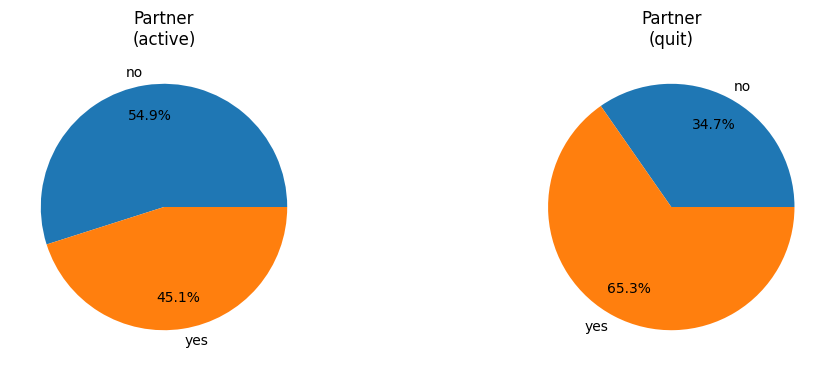

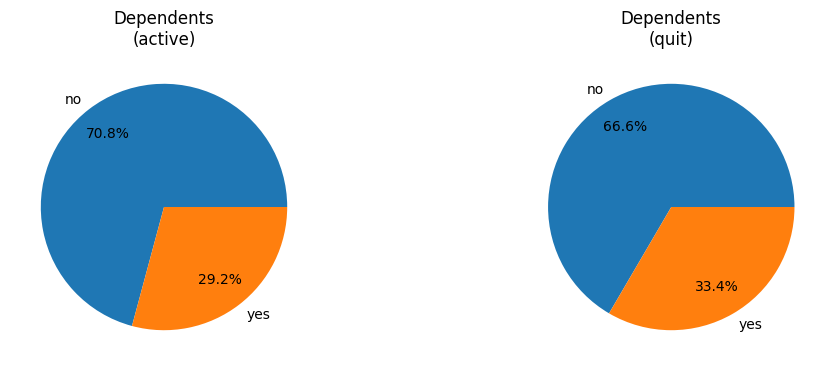

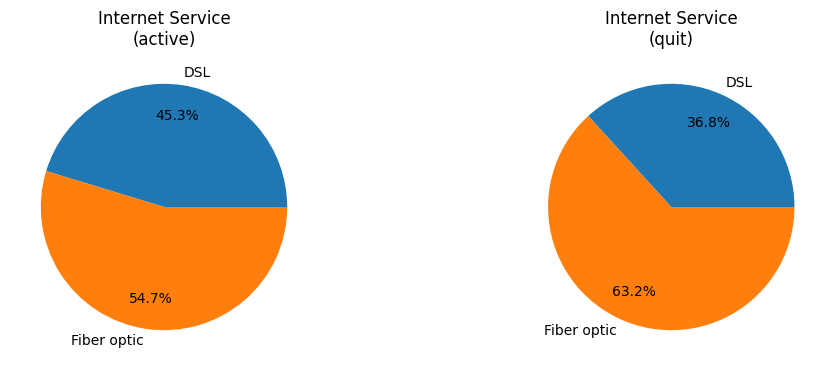

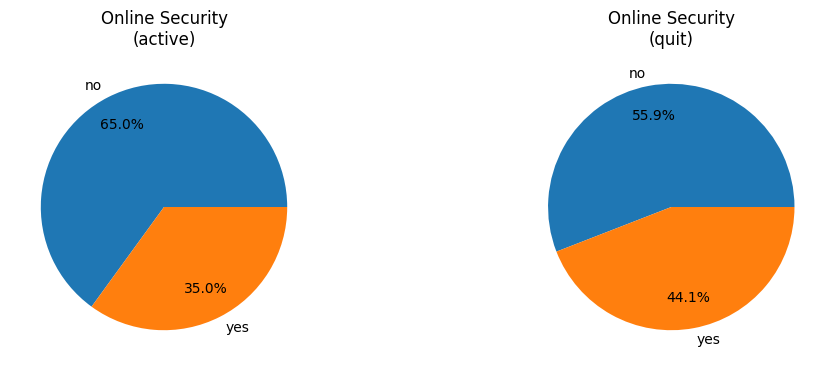

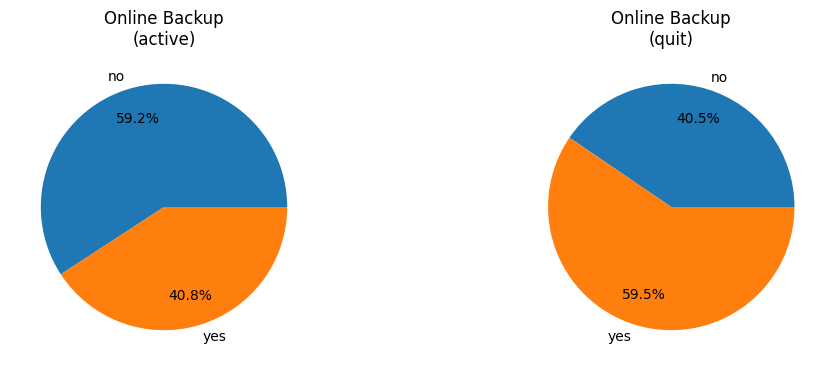

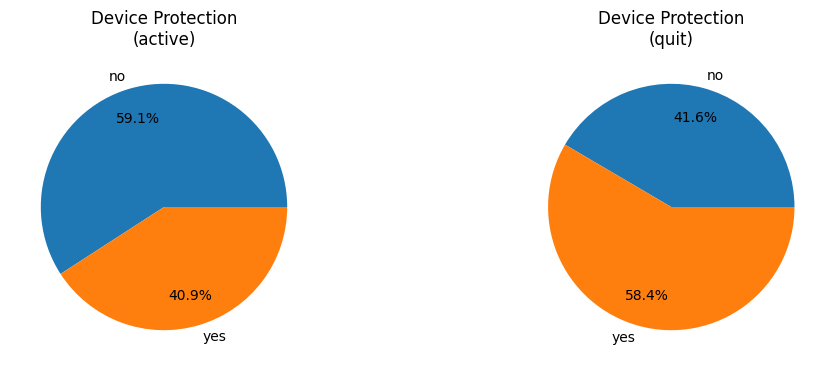

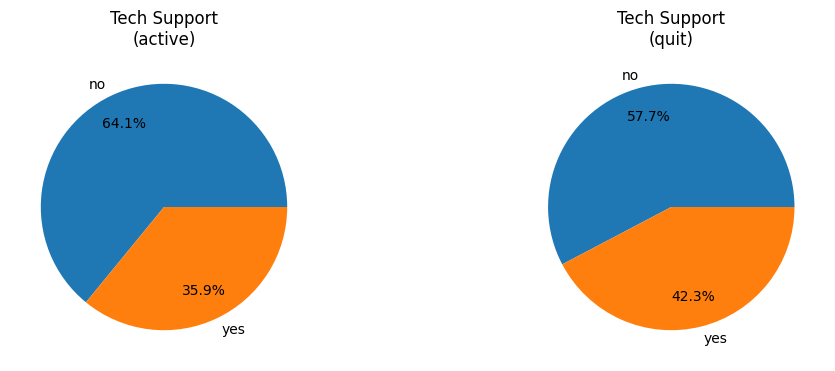

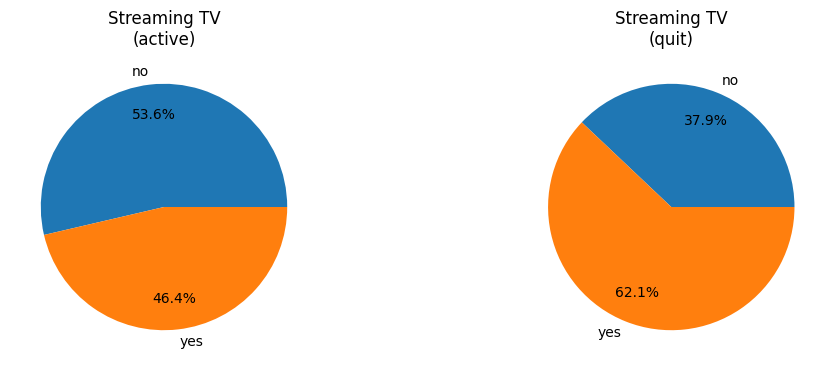

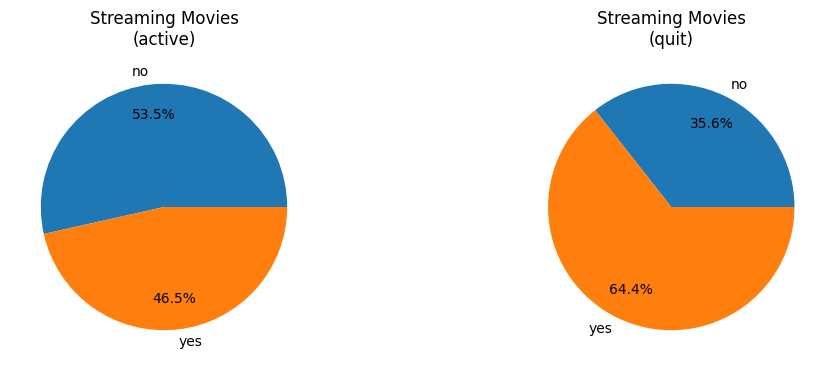

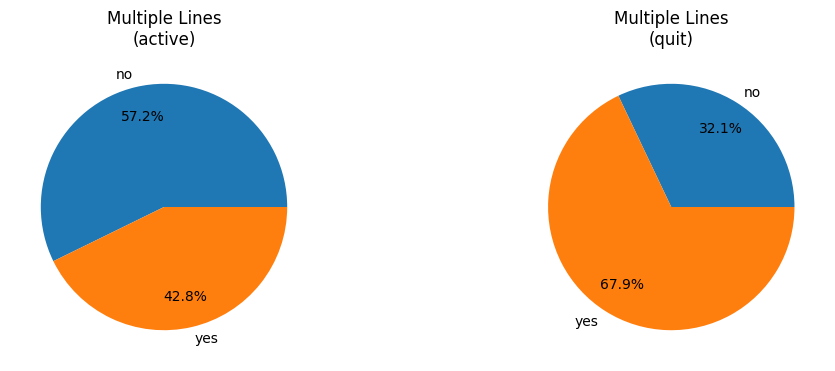

In [11]:
cat_names = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MultipleLines'
]

status = ['active', 'quit']
for i in range(len(cat_names)): 
    f, ax = plt.subplots(figsize=(12, 4),ncols=2,nrows=1)
    pie_data = []
    for j in range(len(status)):
        
        temp_data = full_table[full_table['ClientStatus']==status[j]].groupby(cat_names[i])[cat_names[i]].count()\
                                         /full_table[full_table['ClientStatus']==status[j]][cat_names[i]].count()
        pie_data.append(temp_data)

        ax[j].set_title(en2hu_name(cat_names[i:i+1],all_labels)[0]+
                     '\n('+en2hu_name([status[j]],all_labels)[0]+')')

        if cat_names[i]!='SeniorCitizen':

            ax[j].pie(pie_data[j],\
                    autopct='%1.1f%%',\
                    labels=en2hu_name(pie_data[j].index,all_labels),\
                   pctdistance=0.75,normalize=False)

        else:
            labes = []
            for i in pie_data[j].index:
                labes.append('да' if i>0 else 'нет')
            ax[j].pie(pie_data[j],\
                    autopct='%1.1f%%',\
                    labels=labes,\
                   pctdistance=0.75,normalize=False)

We observe that among clients who terminated their contracts, there is a higher proportion of those who opted for annual or biennial payment plans. Among inactive clents, more of them use electronic billing, which likely indicates they have a partner. It’s not surprising that such clients prefer streaming TV and movie catalogs. Those who left also tended to use multiple phone lines simultaneously.

## Quantitative Features

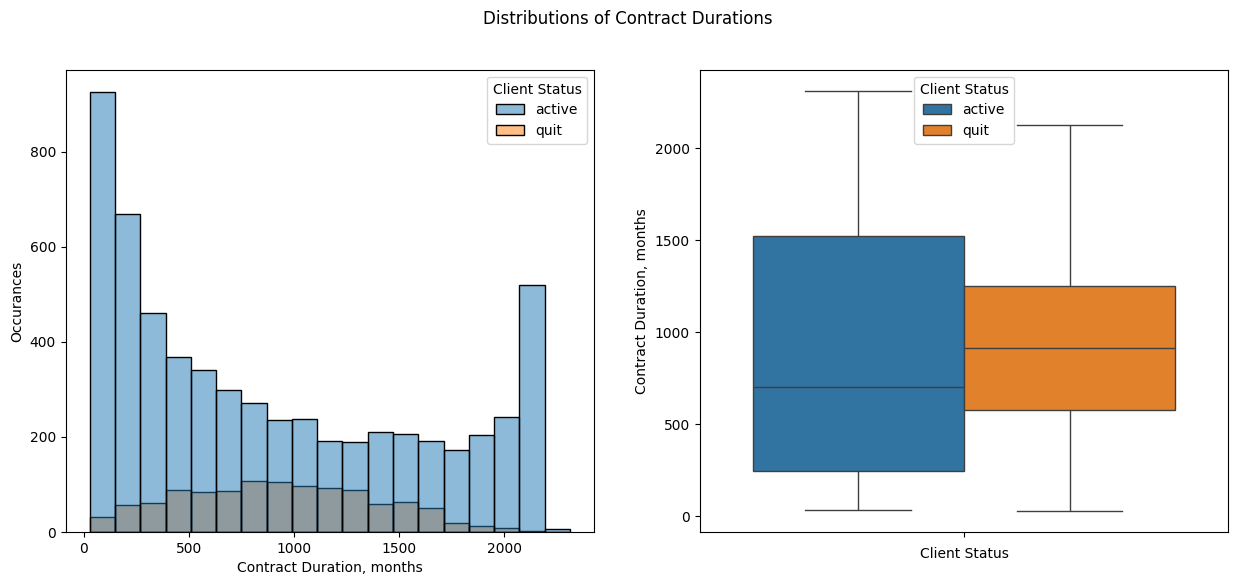

924.8637602179837


In [12]:
y = 'ContractDuration' 
y_label = en2hu_name([y],all_labels)[0]
fig, ax = plt.subplots(1, 2,figsize=(15,6))

sns.histplot(full_table, x=y,ax=ax[0], hue='ClientStatus')
sns.move_legend(ax[0], 'best', title='Client Status',
                labels=en2hu_name(["active", "quit"],all_labels))

sns.boxplot(data=full_table, y=y, hue='ClientStatus', ax=ax[1])
sns.move_legend(ax[1], 'best', title='Client Status',
                labels=en2hu_name(["active", "quit"],all_labels))
ax[0].set_xlabel(y_label+', months')
ax[0].set_ylabel('Occurances')
ax[1].set_ylabel(y_label+', months')
ax[1].set_xlabel('Client Status')

plt.suptitle('Distributions of Contract Durations')
plt.show()

print(full_table[full_table['ClientStatus']=='quit'][y].mean())

We see that the distribution of contract durations for no longer active clients is more or less symmetric around the average of 30 months. It's also evident that many new clients signed their conracts in the last year.

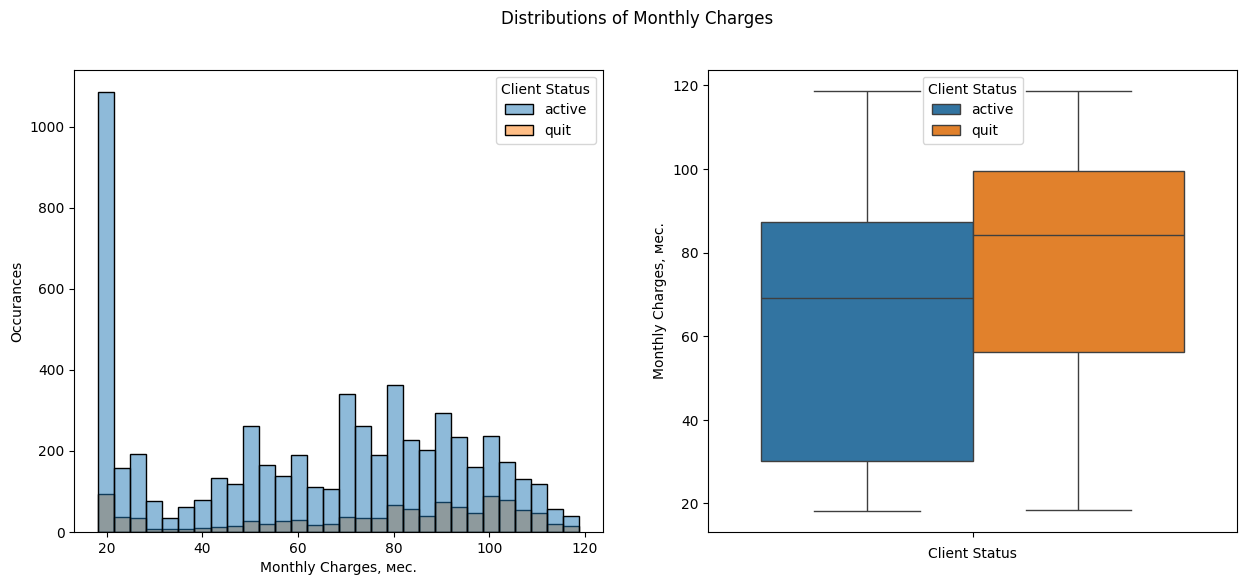

Active clients, median of Monthly Charges 69.25
Churned clients, median of Monthly Charges 84.2


In [13]:
y = 'MonthlyCharges' 
y_label = en2hu_name([y],all_labels)[0]
fig, ax = plt.subplots(1, 2,figsize=(15,6))

sns.histplot(full_table, x=y,ax=ax[0], hue='ClientStatus',bins=30)
sns.move_legend(ax[0], 'best', title='Client Status',
                labels=en2hu_name(["active", "quit"],all_labels))

sns.boxplot(data=full_table, y=y, hue='ClientStatus', ax=ax[1])
sns.move_legend(ax[1], 'best', title='Client Status',
                labels=en2hu_name(["active", "quit"],all_labels))
ax[0].set_xlabel(y_label+', мес.')
ax[0].set_ylabel('Occurances')
ax[1].set_ylabel(y_label+', мес.')
ax[1].set_xlabel('Client Status')

plt.suptitle('Distributions of Monthly Charges')
plt.show()
print('Active clients, median of Monthly Charges',full_table[full_table['ClientStatus']=='active'][y].median())
print('Churned clients, median of Monthly Charges',full_table[full_table['ClientStatus']=='quit'][y].median())

The median monthly expenses of churned clients exceed those of those who remained loyal, which suggests they may have found better prices for the services they need.
Both distributions are left-skewed and characterized by long tails towards higher expenses.

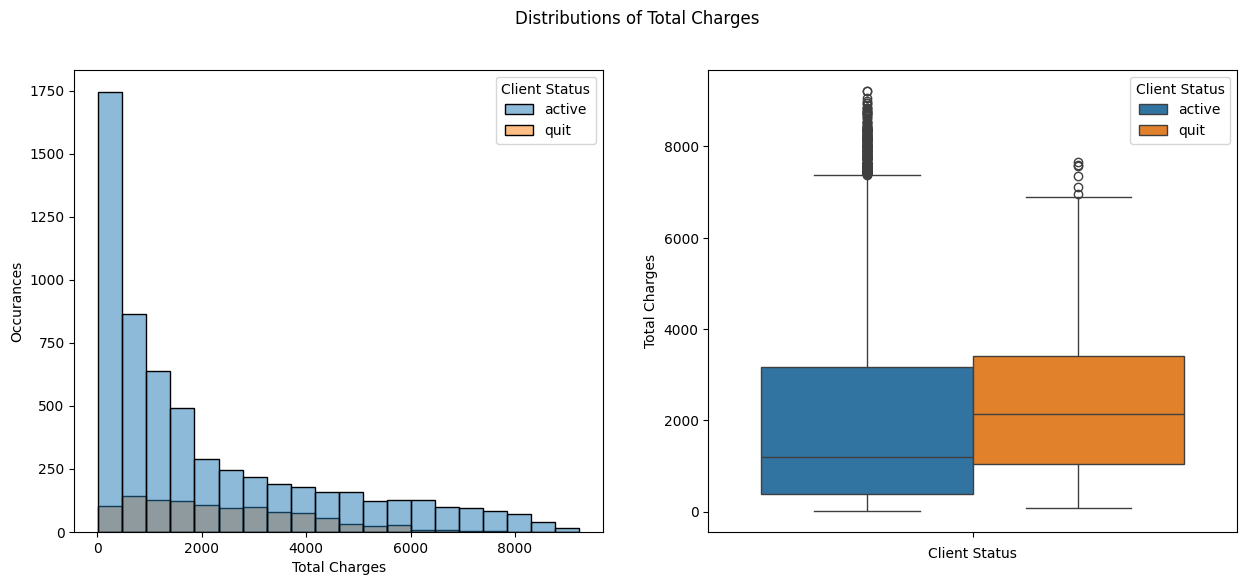

Active clients, median of Total Charges 1194.28
Churned clients, median of Total Charges 2139.03


In [14]:
y = 'TotalCharges' 
y_label = en2hu_name([y],all_labels)[0]
fig, ax = plt.subplots(1, 2,figsize=(15,6))
# ax[0].set_xticks(range(100,900,100))
sns.histplot(full_table, x=y,ax=ax[0], hue='ClientStatus',bins=20)
sns.move_legend(ax[0], 'best', title='Client Status',
                labels=en2hu_name(["active", "quit"],all_labels))

sns.boxplot(data=full_table, y=y, hue='ClientStatus', ax=ax[1])
sns.move_legend(ax[1], 'best', title='Client Status',
                labels=en2hu_name(["active", "quit"],all_labels))

ax[0].set_xlabel(y_label)
ax[0].set_ylabel('Occurances')
ax[1].set_ylabel(y_label)
ax[1].set_xlabel('Client Status')

plt.suptitle('Distributions of Total Charges')
plt.show()
print('Active clients, median of Total Charges',full_table[full_table['ClientStatus']=='active'][y].median())
print('Churned clients, median of Total Charges',full_table[full_table['ClientStatus']=='quit'][y].median())


Both distributions are left-skewed and characterized by long tails towards higher charges.

## Cross-Correlation Analysis

Let's calculate the correlation matrix between the input features and the target.

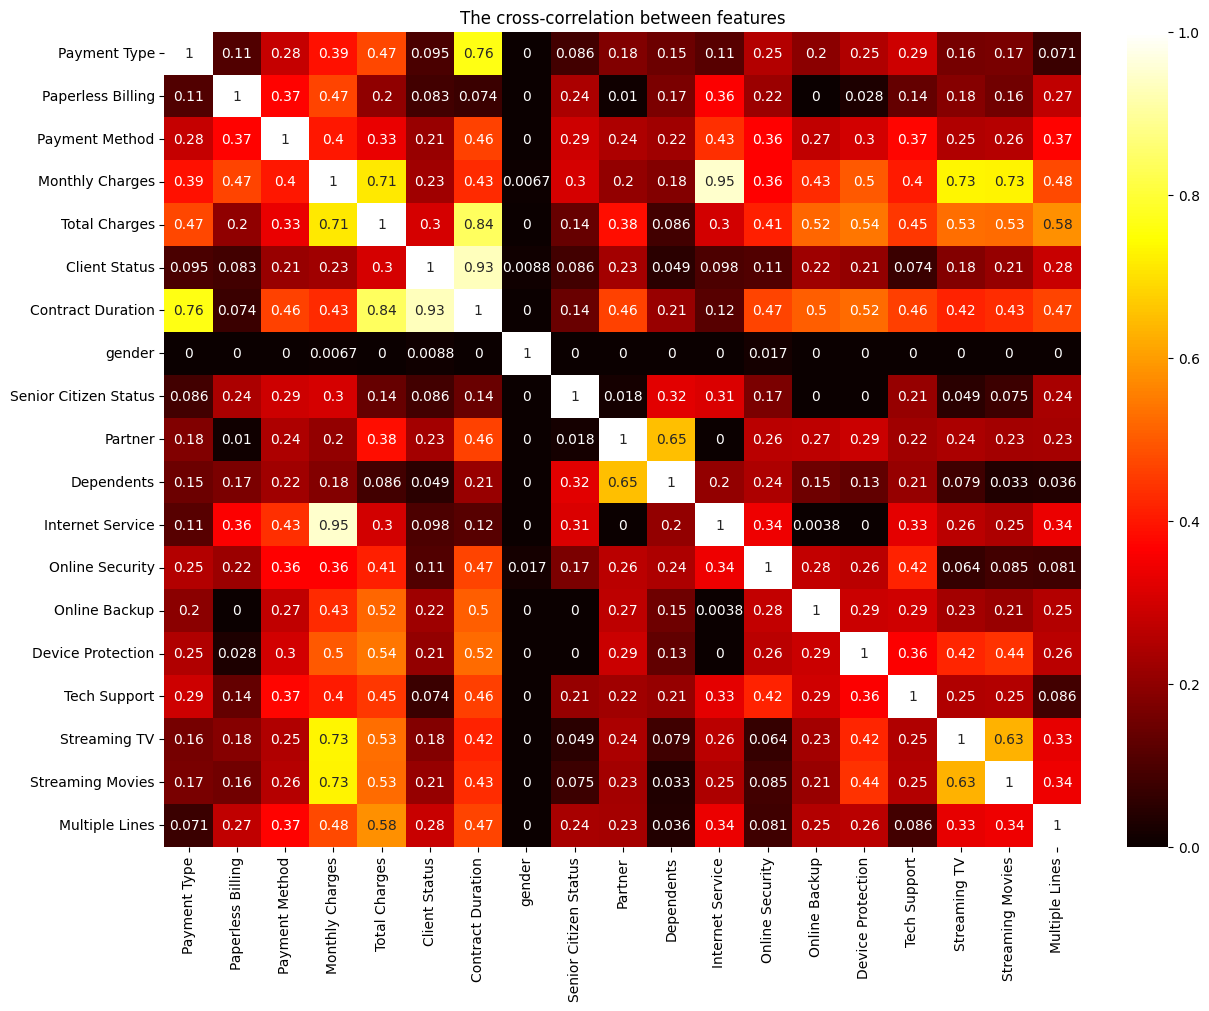

In [15]:
fig, ax = plt.subplots(figsize=(12,10),constrained_layout=True)

num_col_names = ['TotalCharges','MonthlyCharges']

cor_matr = full_table.drop(
            ['customerID',
             'BeginDate',
             'EndDate'], axis=1).phik_matrix(
               interval_cols=num_col_names)
sns.heatmap(cor_matr, annot=True,ax=ax, cmap="hot")
ax.set_xticklabels(en2hu_name(cor_matr.index.to_list(),all_labels),rotation=90)
ax.set_yticklabels(en2hu_name(cor_matr.index.to_list(),all_labels))
ax.set_title('The cross-correlation between features')
plt.show()

In [16]:
print('Feature pair'," "*45, "Correlation level")

num_features = len(cor_matr)-1
cor_matr_col = cor_matr['ClientStatus']
for feature, corrcoef, value in zip(cor_matr.index.to_list(),\
                             cor_matr_col.apply(corrcoef2interp),\
                             cor_matr_col):
    if feature!='ClientStatus':
        print(f"{en2hu_name([cor_matr_col.index[5]],all_labels)[0]} -"
              f" {en2hu_name([feature],all_labels)[0]:40} {corrcoef:15} {value:6.3f}")

Feature pair                                               Correlation level
Client Status - Payment Type                             very weak        0.095
Client Status - Paperless Billing                        very weak        0.083
Client Status - Payment Method                           very weak        0.214
Client Status - Monthly Charges                          very weak        0.225
Client Status - Total Charges                            weak             0.304
Client Status - Contract Duration                        very high        0.933
Client Status - gender                                   very weak        0.009
Client Status - Senior Citizen Status                    very weak        0.086
Client Status - Partner                                  very weak        0.228
Client Status - Dependents                               very weak        0.049
Client Status - Internet Service                         very weak        0.098
Client Status - Online Security            

The target shows a very strong correlation with Contract Duration and a weak correlation with Multiple Lines and Total Charges. We will experiment with features that have a correlation level in the range from 0.1 to 0.23 during model training. There is multicollinearity between Monthly Charges and Internet Service, so we prefer the former over the latter in our models.

Thus, the preliminary list of input features for further train/test data preparation is

- ContractDuration
- TotalCharges
- MultipleLines
- MonthlyCharges (xor/and InternetService)
- Partner
- StreamingMovies
- PaymentMethod

- OnlineBackup
- DeviceProtection

#  Data Preparation for Training and Testing

Разделим входные признаки и на группы для дальнейших преобразований.

In [17]:
drop_cols = [
             'customerID',
             'BeginDate',
             'EndDate'
            ]

data_to_use = full_table.drop(drop_cols, axis=1)

ohe_columns = [
    'PaymentMethod',
     'InternetService',
    'Partner',
    'Dependents',
    'OnlineBackup',
    'MultipleLines'  
                ]

ord_columns = [
               'Type'
              ]

ord_categories = [
                  ['Month-to-month', 'One year', 'Two year']
                 ]

num_columns = [
                'TotalCharges',
                'ContractDuration',
                ]
sel_features = ohe_columns+num_columns+ord_columns

Let's drop duplicates and apply 3:1 train/test split to the data and encode the target.

In [18]:
data_to_use = data_to_use.drop_duplicates()
X_train, X_test, y_train, y_test = split2train_valid(
                                        data_to_use,sel_features
                                        )

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

labels = label_encoder.inverse_transform(y_train[178:180])
label_encoder.transform(labels)
print('Target label encoding')
print(labels ,'->',label_encoder.transform(labels),'\n')


Target label encoding
['quit' 'active'] -> [1 0] 



# Training Machine Learning Models

The search for the best model is better conducted within the class of decision trees. First, without gradient boosting, we'll use the DecisionTree and RandomForest classifiers. We will create a pipeline and use cross-validation to find the best combination of hyperparameters through a randomized grid search. The 'most frequent' option is outperformed by the 'constant' strategy, as we are already observing an imbalance in the target variable.

In [19]:
#pipeline buildong blocks, using OHE/ORD encoding
# OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe',SimpleImputer(missing_values=np.nan
                                          , strategy='constant'
                                                  ,fill_value='NA'
                                          )),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                handle_unknown='ignore'))
    ]
 )

ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan\
                                                    , strategy='constant'
                                                  ,fill_value='NA'
                                                  )),
        ('ord',  OrdinalEncoder(categories=ord_categories,
                                handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan\
                                                  , strategy='most_frequent'))
    ]
)

# data preprocessing
data_preprocessor = ColumnTransformer(
    [
     ('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# final pipeline
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])


param_grid = [
    #  DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': ['passthrough']  
    },
    # RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators':np.arange(100,200,50),
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': ['passthrough']  

    },
]

randomized_search_class = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=40,
    refit=True,
    return_train_score=True
)
randomized_search_class.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(fill_value='NA',
                                                                                                              strategy='constant')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['PaymentMethod',
                                                                                'InternetService',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'OnlineBacku...
                                         'models__min_samples_split': range(2, 10),
                                         'preprocessor__num': ['passthrough']},
                                        {'models': [RandomForestClassifier(random_state=50824)],
                                         'models__max_depth': range(2, 15),
                                         'models__max_features': range(2, 15),
                                         'models__min_samples_split': range(2, 10),
                                         'models__n_estimators': array([100, 150]),
                                         'preprocessor__num': ['passthrough']}],
                   random_state=50824, return_train_score=True,
                   scoring='roc_auc')

# Selecting the Best Model

In [20]:
print('The best model and its parameters:\n\n', randomized_search_class.best_estimator_)
print (f'The ROC-AUC metric of the best model on the cross-validation set: {randomized_search_class.best_score_:5.4f}')
y_test_pred = randomized_search_class.best_estimator_.predict_proba(X_test)[:,1]
test_score = roc_auc_score(y_test, y_test_pred)
print(f'The ROC-AUC metric of the best model on the test set: {test_score:5.4f}')

dummy_regr = DummyClassifier(strategy="most_frequent")
dummy_regr.fit(X_train, y_train)
dummy_test_score = roc_auc_score(y_test,dummy_regr.predict_proba(X_test)[:,1])
print('On the test set')
print(f'The ROC-AUC metric of the best model is higher than that of the constant model by'
      f' {round((test_score-dummy_test_score)*100,1):.1f} %')

The best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['PaymentMethod',
                                                   'InternetService', 'Partner',
                                                   'Dependents', 'OnlineBackup',
              

The best model turned out to be the RandomForest with 150 trees, a depth of 10, and 14 features for splitting. The ROC-AUC metric reached the threshold value 0.85 on the test set.

## Best Model: CatBoost

Constructing input features for CatBoost.

In [21]:
full_cats = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MultipleLines'
]

#all categorical with subcategories-strings
cat_list = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
    'gender',
#     'SeniorCitizen', #categorical integer-valued
    'Partner',
    'Dependents',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MultipleLines'
]
#those containing missing values
na_cols = [
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MultipleLines'
]
NA ='NA'

To train a CatBoost model, we will use the same input features as in the preious pipeline. Missing values will be replaced with NA='Not Available', as an additional subcategory. We will visualize the training process on cross-validation sets.

In [22]:
drop_cols = [
             'customerID',
             'BeginDate',
             'EndDate'
            ]


full_table_no_na = full_table.drop(drop_cols, axis=1).copy()
full_table_no_na = full_table_no_na.drop_duplicates()

for key in cat_list:
    if key in na_cols:
        full_table_no_na[key]=full_table_no_na[key].fillna('NA')
     
    n_subcat = len(full_table_no_na[key].unique())
    l = full_table_no_na[key].unique()
    
    repl_dic = {}
    for i in range(n_subcat):
        repl_dic[l[i]] = i
    full_table_no_na[key] = full_table_no_na[key].replace(to_replace=repl_dic) 
    
ohe_columns = [
    'PaymentMethod',
     'InternetService',
    'Partner',
    'Dependents',
    'OnlineBackup',
    'MultipleLines'
                ]

ord_columns = [
               'Type'
              ]

ord_categories = [
                  ['Month-to-month', 'One year', 'Two year']
                 ]

num_columns = [
                'TotalCharges',
                'ContractDuration',
                ]
sel_features = ohe_columns+num_columns+ord_columns


full_table_no_na = full_table_no_na.drop_duplicates()
X_train, X_test, y_train, y_test = split2train_valid(full_table_no_na
                                        ,sel_features
                                        )

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

labels = label_encoder.inverse_transform(y_train[178:180])
label_encoder.transform(labels)
print('Target label encoding')
print(labels ,'->',label_encoder.transform(labels),'\n')

cat_features = extract_cats(full_table_no_na[sel_features], full_cats)

params = {
    'loss_function': 'Logloss',
    'iterations': 1500,
    'custom_loss': 'AUC',
    'random_seed': RANDOM_STATE,
    'learning_rate': 0.01,
    'depth':6,
}

cv_data = cv(
    params=params,
    pool=Pool(X_train, label=y_train, cat_features=cat_features),
    fold_count=5, 
    shuffle=True, 
    partition_random_seed=RANDOM_STATE,
    plot=True, 
    stratified=True, 
    verbose=False
)


Target label encoding
['quit' 'active'] -> [1 0] 

Using 0 PaymentMethod
Using 1 InternetService
Using 2 Partner
Using 3 Dependents
Using 4 OnlineBackup
Using 5 MultipleLines
Using 8 Type


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2997549304
bestIteration = 1498

Training on fold [1/5]

bestTest = 0.3060962219
bestIteration = 1499

Training on fold [2/5]

bestTest = 0.295390362
bestIteration = 1499

Training on fold [3/5]

bestTest = 0.2902350329
bestIteration = 1499

Training on fold [4/5]

bestTest = 0.3053628022
bestIteration = 1499



Let's find the best average AUC across five validation sets.

In [23]:
best_value = np.max(cv_data['test-AUC-mean'])
best_iter = np.argmax(cv_data['test-AUC-mean'])
print('Best average AUC on the validation set:'
     +f" {best_value:.4f}+/-{cv_data['test-AUC-std'][best_iter]:.3f}")

Best average AUC on the validation set: 0.8657+/-0.010


Let's retrain the model on the entire training set and check out the AUC value on the test set.

In [24]:
model = CatBoostClassifier(iterations=1500, learning_rate=0.01, depth=6,
                          random_seed=RANDOM_STATE, 
                          custom_loss=['AUC'],verbose=500,
                          )
model.fit(X_train, y_train, cat_features=cat_features)
predictions = model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, predictions)
print(f"The ROC-AUC metric on the test set: {auc:.5f}")  

0:	learn: 0.6847160	total: 32.3ms	remaining: 48.5s
500:	learn: 0.3129837	total: 12.5s	remaining: 24.9s
1000:	learn: 0.2901290	total: 25.9s	remaining: 12.9s
1499:	learn: 0.2521883	total: 41.7s	remaining: 0us
The ROC-AUC metric on the test set: 0.87737


## Feature Importance

Let's examine which features contribute the most to determining the target class using this model.

In [25]:
imp_ids = np.flip(np.argsort(model.feature_importances_))
imps = model.feature_importances_
feanames = np.array(model.feature_names_,str)
feature_df = pd.DataFrame({
                           'Feature name':en2hu_name(feanames[imp_ids],all_labels),
                           'Importance':imps[imp_ids]
})
display(feature_df)

,Feature name,Importance
0,Contract Duration,45.638603
1,Payment Type,14.357221
2,Total Charges,9.716557
3,Multiple Lines,7.585797
4,Payment Method,6.647929
5,Online Backup,5.653761
6,Partner,4.440318
7,Internet Service,4.201067
8,Dependents,1.758747


The top four most important features affecting predictions are Contract Duration, Payment Type, Total Charges, and Multiple Lines.

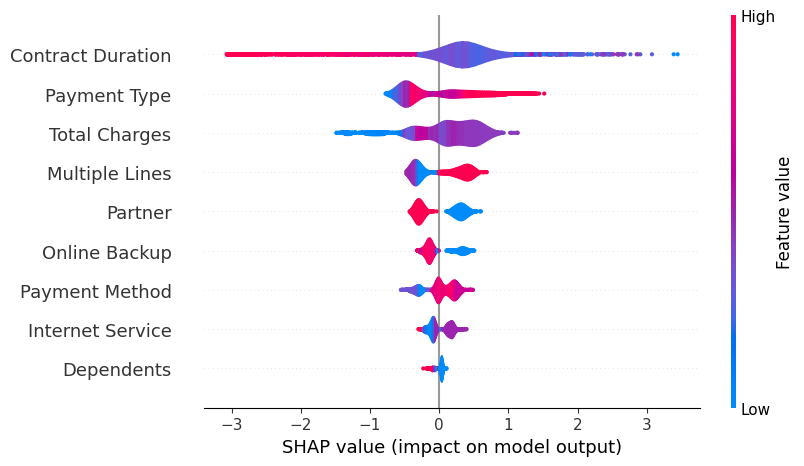

In [26]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
names = en2hu_name(model.feature_names_,all_labels)
shap.plots.violin(shap_values,feature_names=names)

The longer the contract, the higher the likelihood that the client will continue using the services of the internet provider. Additionally, the data shows that the lower the client's charges, the more likely they are to remain with the service. Based on the data analysis, clients who pay once every two years are more likely to terminate their contracts (high feature value), as indicated by the high SHAP value and the high concentration of points near this value.

## Confusion Matrices

Recall on the test set 36.36% at 0.5 probability threshold
Recall on the test set 76.00% 0.2 probability threshold


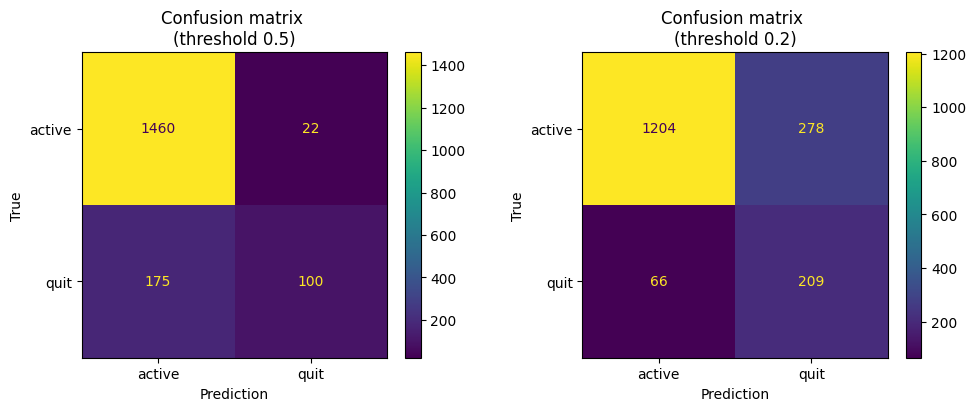

In [27]:
y_pred = model.predict(X_test)
recall = recall_score(y_test,y_pred,pos_label=1)

thres = 0.2
y_pred_thres=np.where([predictions>=thres],1,0)[0]
recall_thres = recall_score(y_test,y_pred_thres,pos_label=1)


fig, ax = plt.subplots(1,2,figsize=(10,4),constrained_layout=True)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax[0])
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_thres,ax=ax[1])

ll = []
for label in ax[0].xaxis.get_ticklabels():
    ll.append(int(label.get_text()))

for i in range(len(ax)):
    ax[i].set_xticklabels(en2hu_name(label_encoder.inverse_transform(ll),all_labels))
    ax[i].set_yticklabels(en2hu_name(label_encoder.inverse_transform(ll),all_labels))
    ax[i].set_xlabel('Prediction')
    ax[i].set_ylabel('True')

ax[0].set_title('Confusion matrix \n(threshold 0.5)')
ax[1].set_title(f'Confusion matrix \n(threshold {thres})')

print(f'Recall on the test set {recall*100:.2f}% at 0.5 probability threshold')
print(f'Recall on the test set {recall_thres*100:.2f}% {thres} probability threshold')
plt.show()

With a 0.2 threshold, the best model can identify potential "quitters" with 76% accuracy.

# Conclusion and Recommendations

* We trained several machine learning models on data provided by the telecom company, where approximately 1/6 of the clients had already left the company at the time the data was extracted.

* The data primarily consists of a large set of categorical features, and models using decision trees with/without gradient boosting show good results (AUC$\geq0.85$). 

* The CatBoost gradient boosting model turned out to be the best model with 1500 boosting iterations and a tree depth of 6 for individual trees in the ensemble. The AUC metric on 5 cross-validation sets was $0.8657\pm0.010$, and on the test set, AUC = 0.877. 

* Using correlation analysis and feature importance coefficients, we identified the features that most strongly impact whether a client will leave or not. Using a correlation coefficient criterion of $\gtrapprox$ 0.2, we selected the following features used in the model training, ordered from most important to least important:

|Feature|
|:--------:|
|Contract Duration |
|Payment Type 	        |	
|Total Charges 	|	
|MultipleLines 	|	
|Payment Method 	| 
|Online Backup 	|	
|Partner 	|	
|Internet Service| 	
|Dependents |	

There is multicollinearity between the Internet Service and Monthly Charges, the best model and its competitors perform slightly better without the Monthly Charges feature. 

For categorical features (MultipleLines, OnlineBackup, Partner, InternetService, Dependents) and the ordinal feature (Type), one-hot encoding (OHE) and ordinal encoders were used. 

**Recommendations:**

* For marketing campaigns and customer retention efforts, focus on those with shorter contracts and higher-than-average expenses. Among those who choose annual or biennial payment plans, there may be a higher likelihood of churn. Additionally, customers with multiple lines are more prone to leaving, possibly because competitors offer more attractive options. 

* If the company has a limited budget for customer retention, a suitable probability threshold and the recall metric can be used to create a list of "at-risk" customers with an acceptable margin of error. Alternatively, the focus could be shifted to acquiring new customers, emphasizing the characteristics of more loyal ones.